# 0.) Import the Credit Card Fraud Data From CCLE

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [54]:
df = pd.read_csv("fraudTest.csv")

In [55]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [56]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

C:\Users\akudu\AppData\Local\Temp\ipykernel_34784\2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
C:\Users\akudu\AppData\Local\Temp\ipykernel_34784\2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [61]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [24]:
pip uninstall scikit-learn imbalanced-learn

^C
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [57]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [62]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

C:\Users\akudu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akudu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

# 4.) Test the three models

In [65]:
over_log.score(X_test, y_test)

0.8483888768924398

In [66]:
under_log.score(X_test, y_test)

0.961431416300775

In [67]:
smote_log.score(X_test, y_test)

0.9280093092444637

In [68]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [69]:
# Sensitivity here in credit fraud is more important as seen from last class

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
y_true = y_test

In [72]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[70501, 12555],
       [   83,   219]], dtype=int64)

In [73]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7251655629139073


In [74]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[79924,  3132],
       [   83,   219]], dtype=int64)

In [75]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7251655629139073


In [76]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77138,  5918],
       [   83,   219]], dtype=int64)

In [77]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7251655629139073


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [85]:
X_train = pd.DataFrame(X_train)
y_train = pd.Series(y_train)

In [86]:
raw_temp = pd.concat([X_train, y_train], axis =1)

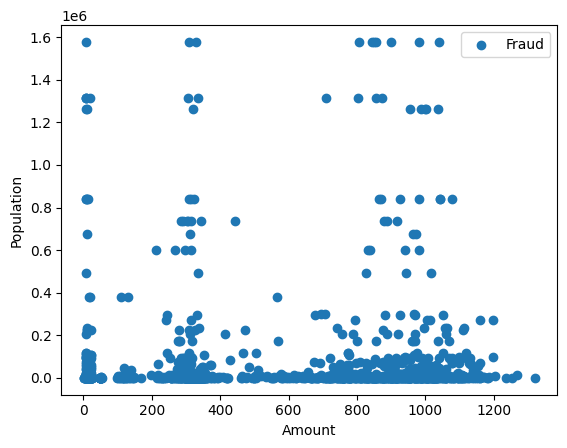

In [87]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

Drawback of SMOTE : If we were asked to put some synthetic data, we would ideally put the observations around the already existing observations. However, with SMOTE, the average of the closest 5 would give us a position for an observation that is far from the existing positions.

In [88]:

raw_temp = pd.concat([smote_X, smote_y], axis =1)


C:\Users\akudu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


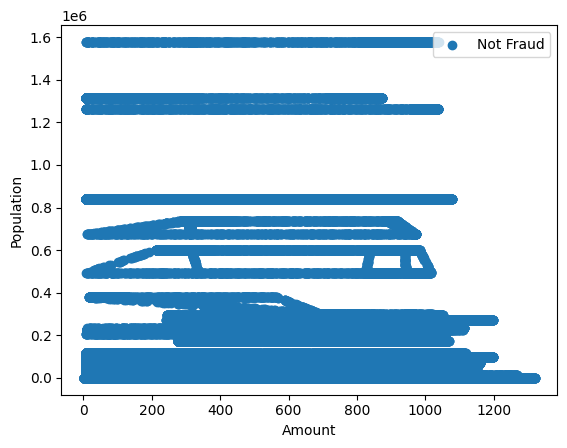

In [89]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [119]:
resample_methods = {
    "over": RandomOverSampler(),
    "under": RandomUnderSampler(),
    "smote": SMOTE()
}

model_configs = {
    "LOG": LogisticRegression(),
    "LASSO": LogisticRegression(penalty = "l1",C = 2., solver="liblinear"),
    "DTRE": DecisionTreeClassifier()
}

In [120]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def calc_perf_metric(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()  # Unpack the values from the confusion matrix
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return sensitivity, specificity, precision, recall, f1

In [121]:
trained_models = {}
results = []

In [122]:
trained_models["key1"] = "value1"

In [123]:
for resample_key,resampler in resample_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train, y_train)
    
    for model_key, model in model_configs.items():
        combined_key = f"{resample_key}_{model_key}"
        trained_models[combined_key] = model.fit(resample_X, resample_y)
        y_pred = trained_models[combined_key].predict(X_test)
        sensitivity, specificity, precision, recall, f1 = calc_perf_metric(y_test, y_pred)
        results.append({"Model" : combined_key,
                        "Sensitivity": sensitivity,
                        "specificity" : specificity,
                        "precision" : precision,
                        "recall" : recall,
                        "f1" : f1})
        print(combined_key)

C:\Users\akudu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


over_LOG
over_LASSO
over_DTRE


C:\Users\akudu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


under_LOG
under_LASSO
under_DTRE


C:\Users\akudu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


smote_LOG
smote_LASSO
smote_DTRE


In [124]:
results_df = pd.DataFrame(results)
results_df

,Model,Sensitivity,specificity,precision,recall,f1
0,over_LOG,0.731788,0.950588,0.051098,0.731788,0.095526
1,over_LASSO,0.738411,0.892061,0.024271,0.738411,0.046997
2,over_DTRE,0.552980,0.998423,0.560403,0.552980,0.556667
3,under_LOG,0.741722,0.948047,0.049350,0.741722,0.092543
4,under_LASSO,0.748344,0.907881,0.028691,0.748344,0.055263
5,under_DTRE,0.943709,0.942593,0.056402,0.943709,0.106443
6,smote_LOG,0.725166,0.926206,0.034499,0.725166,0.065865
7,smote_LASSO,0.721854,0.980892,0.120776,0.721854,0.206929
8,smote_DTRE,0.625828,0.997399,0.466667,0.625828,0.534653


Based on the provided model performance metrics, we can analyze the following:

1. **Sensitivity (True Positive Rate)**:
   - The models "under_DTRE" and "over_LOG" have the highest sensitivities, indicating their ability to correctly identify positive cases.

2. **Specificity (True Negative Rate)**:
   - The models "under_DTRE" and "over_DTRE" have the highest specificities, indicating their ability to correctly identify negative cases.

3. **Precision**:
   - The models "smote_LASSO" and "under_DTRE" have the highest precision values, suggesting a high proportion of true positive predictions among their positive predictions.

4. **Recall (Sensitivity)**:
   - Similar to sensitivity, the models "under_DTRE" and "over_LOG" exhibit the highest recall values.

5. **F1 SCORE**:
   - The models "over_DTRE" and "under_DTRE" have the highest F1 scores, indicating a good balance between precision and recall.

Overall, the decision tree-based models, especially the "under_DTRE" model perform well across multiple performance metrics. The logistic regression models also show competitive performance, particularly when using oversampling or SMOTE techniques. However, the LASSO logistic regression models generally exhibit lower precision values compared to other models, suggesting a higher rate of false positive predictions.

In [125]:
resample_X_holdout, resample_y_holdout = smote.fit_resample(X_train, y_train)
log_reg = LogisticRegression()
model_holdout = log_reg.fit(resample_X_holdout, resample_y_holdout)
y_pred_holdout = model_holdout.predict(X_holdout)
tn, fp, fn, tp = confusion_matrix(y_holdout, y_pred_holdout).ravel()
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = precision_score(y_holdout, y_pred_holdout)
recall = recall_score(y_holdout, y_pred_holdout)
f1 = f1_score(y_holdout, y_pred_holdout)
print({"Model" : combined_key,
                        "Sensitivity": sensitivity,
                        "specificity" : specificity,
                        "precision" : precision,
                        "recall" : recall,
                        "f1" : f1})

{'Model': 'smote_DTRE', 'Sensitivity': 0.7304075235109718, 'specificity': 0.9186767663387083, 'precision': 0.03335241912396221, 'recall': 0.7304075235109718, 'f1': 0.06379192334017796}


C:\Users\akudu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Out-of-sample performance on the holdout data is as expected, with all metrics performing well in comparison to their levels on in-sample data.
This reinforces the conclusion that logistic regression is the most consistent model for giving results in out-of-sample datasets. With a sensitivity of about 75%, logistic regression outperforms all.